![Texto](https://dadosaocubo.com/wp-content/uploads/2020/06/DADOS-AO-CUBO-Vers%C3%A3o-04-1.png) 

[__D³__](https://dadosaocubo.com/) by [__Tiago Dias__](https://www.linkedin.com/in/diasctiago/) 

Neste post vamos abordar um dos conceitos mais básicos dos modelos de Machine Learning (ML), mas não mesmo importante que os demais modelos. A regressão linear apesar de um modelo relativamente simples, se comparado a outros que abordaremos em outros posts, tem um grande poder de predição e é solução para diversos problemas comuns. Antes de ver a sua aplicação com a biblioteca scikit-learn, vamos ver alguns conceitos importantes que não devem ser esquecidos.

### Regressão linear

A regressão linear pode ser definida pela estatística como uma equação que busca estimar o(s) valor(es) de **y**, dados uma ou mais variáveis **x**. Sendo definido pela equação matemática:

$$ y = a + bx $$

Onde **y** é a variável dependente de **x**, **a** é coeficiente linear e **b** é o coéficiente angular. Calma que não é tão dificil quanto parece, na prática é bem mais simples, vamos em frente.

Curiosidades: 
1.   Apesar do nome, a regressão linear também lida com relações não lineares.
2.   Problemas de regressão as variáveis independentes podem ser numéricas ou categóricas, enquanto a variável explicada (dependente) é sempre numérica.

#### Teoria

Para ficar mais claro a nossa equação da regressão linear, podemos observar as variáveis **a** que vai definir o deslocamento da reta e a variável **b** que vai devinir a inclinação da reta representas na figura abaixo.

<img src="https://raw.githubusercontent.com/dadosaocubo/regressao_linear/master/RegLinear.png" width="350"/>

Nesta figura temos um exemplo onde a variável **y** é dependente de apenas uma variável **x**, mas nos problemas do mundo real, normalmente o que temos é a variável **y** dependente de várias variáveis **x**.

$$ y = b_{0} + b_{1}x_{i1} + b_{2}x_{i2} + ... + + b_{p}x_{ip} $$

Onde vamos ter o numero **p** de variaveis **x** e o **i** denota a **i**-ésima observação do conjunto de treino. Mas não vamos nos preocupar com o tamanho da conta que o algoritimo vai fazer para nós o importante nesse momento é entender o conceito por tras da formula.




#### Prática

Aplicando todos esses conceitos e formulas que vimos acima, vamos utilizar o python e sua poderosa biblioteca para ML a [scikit-learn](https://scikit-learn.org/stable/index.html) lá podemos encontrar o famoso dataset com os preço de casas em Boston, disponível na prória biblioteca do scikit-learn como [load_boston()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html). Mas o que é o scikit-learn? 

![scikit-learn](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

Essa biblioteca possui um conjunto de ferramentas para a ciência de dados inclusive para fazer regressões lineares como vamos ver aqui hoje, mas vamos explorar todos os seus poderes especiais em diversos outros posts.

Com os dados desse dataset é possível baseado nas suas features (variáveis independentes ou  o **x**), fazer predições do target (variável dependente ou o **y**) neste problema o preço das casas em Boston. Vamos começar com um algoritimo mais simples e ir subindo o nível.

##### Importando bibliotecas

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

##### Carregando dados do dataset de diabetes

In [124]:
boston = load_boston()
features, target, feature_names = boston.data, boston.target, boston.feature_names
df = pd.DataFrame(data=features, columns=feature_names)
df['PRICE'] = target
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


##### Visualizando dados

In [125]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


##### LinearRegression

Selecionando Variáveis para o modelo

In [127]:
X = df[['LSTAT']]
y = df.PRICE

Dividindo os dados em treino e teste

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Criando o modelo

In [129]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:20]

array([25.73148728, 26.53821072, 22.83112443, 28.17086531, 20.52620031,
       21.84192783,  5.68825128, 24.89595228, 26.95117629, 18.04840688,
       17.04960643, 11.04719986, 25.55861797, 29.18887346, -1.99482912,
       31.07122816, 12.10362342, 29.18887346, 23.21527845, 29.9571815 ])

In [130]:
print('Coeficientes:', regr.coef_)

Coeficientes: [-0.97420962]


#### Validação de regressão

<img src="https://raw.githubusercontent.com/dadosaocubo/regressao_linear/master/RegLinearErro.png" width="350"/>

##### Erro Quadrado Médio (Mean Squared Error)

In [131]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 45.88


##### Erro Médio Absoluto (Median Absolute Error)

In [132]:
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.85


##### R2 Score

In [133]:
print('Score: %.2f' % r2_score(y_test, y_pred))

Score: 0.52


##### Visualizando os resultados

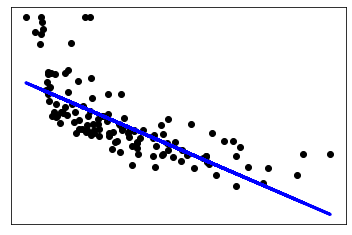

In [134]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

### Referências
*   [Introduction to Machine Learning Algorithms: Linear Regression](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a)
*   [Regressão linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear)
*   [Ridge Regression for Better Usage](https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db)
*   [Lasso (estatísticas)](https://pt.qwe.wiki/wiki/Lasso_(statistics))
*   [Understanding Regression Error Metrics in Python](https://www.dataquest.io/blog/understanding-regression-error-metrics/)